# Kaggle Zillow Test 2

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
train_df = pd.read_csv('../data/train_2016_v2.csv')
prop_df = pd.read_csv('../data/properties_2016.csv')
samp = pd.read_csv('../data/sample_submission.csv')

print (train_df.head())
print (prop_df.head())  

/Users/Wes/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


   parcelid  logerror transactiondate
0  11016594    0.0276      2016-01-01
1  14366692   -0.1684      2016-01-01
2  12098116   -0.0040      2016-01-01
3  12643413    0.0218      2016-01-02
4  14432541   -0.0050      2016-01-02
   parcelid  airconditioningtypeid  architecturalstyletypeid  basementsqft  \
0  10754147                    NaN                       NaN           NaN   
1  10759547                    NaN                       NaN           NaN   
2  10843547                    NaN                       NaN           NaN   
3  10859147                    NaN                       NaN           NaN   
4  10879947                    NaN                       NaN           NaN   

   bathroomcnt  bedroomcnt  buildingclasstypeid  buildingqualitytypeid  \
0          0.0         0.0                  NaN                    NaN   
1          0.0         0.0                  NaN                    NaN   
2          0.0         0.0                  NaN                    NaN   
3      

In [4]:
print(train_df.columns)
print(prop_df.columns)
print(train_df.shape)
print(prop_df.shape)

Index(['parcelid', 'logerror', 'transactiondate'], dtype='object')
Index(['parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstr

In [5]:
train_df = pd.merge(train_df, prop_df, on='parcelid', how='left')
print(train_df.head())
print(train_df.shape)

   parcelid  logerror transactiondate  airconditioningtypeid  \
0  11016594    0.0276      2016-01-01                    1.0   
1  14366692   -0.1684      2016-01-01                    NaN   
2  12098116   -0.0040      2016-01-01                    1.0   
3  12643413    0.0218      2016-01-02                    1.0   
4  14432541   -0.0050      2016-01-02                    NaN   

   architecturalstyletypeid  basementsqft  bathroomcnt  bedroomcnt  \
0                       NaN           NaN          2.0         3.0   
1                       NaN           NaN          3.5         4.0   
2                       NaN           NaN          3.0         2.0   
3                       NaN           NaN          2.0         2.0   
4                       NaN           NaN          2.5         4.0   

   buildingclasstypeid  buildingqualitytypeid         ...           \
0                  NaN                    4.0         ...            
1                  NaN                    NaN         

## 1. COLUMNS WITH NON-VARIANCE
### Recherche de colonnes avec une valeur unique

In [6]:
count = 0
for c in list(train_df):
    if (len(train_df[c].unique()) == 1):
        print(c)
        count+=1
print(count)

assessmentyear
1


### Recherche de colonnes avec moins de 1% de valeurs uniques

In [7]:
count = 0
low_var_cols = []
for c in list(train_df):
    if (len(train_df[c].unique()) < 907):
        print(c)
        low_var_cols.append(c)
        count+=1
print(count)

transactiondate
airconditioningtypeid
architecturalstyletypeid
basementsqft
bathroomcnt
bedroomcnt
buildingclasstypeid
buildingqualitytypeid
calculatedbathnbr
decktypeid
finishedsquarefeet13
finishedsquarefeet6
fips
fireplacecnt
fullbathcnt
garagecarcnt
garagetotalsqft
hashottuborspa
heatingorsystemtypeid
poolcnt
poolsizesum
pooltypeid10
pooltypeid2
pooltypeid7
propertycountylandusecode
propertylandusetypeid
regionidcity
regionidcounty
regionidneighborhood
regionidzip
roomcnt
storytypeid
threequarterbathnbr
typeconstructiontypeid
unitcnt
yardbuildingsqft17
yardbuildingsqft26
yearbuilt
numberofstories
fireplaceflag
assessmentyear
taxdelinquencyflag
taxdelinquencyyear
43


In [8]:
len(low_var_cols)

43

In [9]:
count = 0
low_var_drop_cols = []
for c in low_var_cols:
    if (train_df[c].nunique() <= 2):
        print(c)
        low_var_drop_cols.append(c)
        count+=1
print(count)
len(low_var_drop_cols)

buildingclasstypeid
decktypeid
hashottuborspa
poolcnt
pooltypeid10
pooltypeid2
pooltypeid7
storytypeid
fireplaceflag
assessmentyear
taxdelinquencyflag
11


11

In [10]:
print(train_df['assessmentyear'].nunique())

1


## 2. COLUMNS WITH MISSING VALUES

In [11]:
#--- List of columns having Nan values and the number ---

missing_col = train_df.columns[train_df.isnull().any()].tolist()
print(missing_col)
print('There are {} missing columns'.format(len(missing_col)))

['airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft', 'buildingclasstypeid', 'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid', 'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa', 'heatingorsystemtypeid', 'lotsizesquarefeet', 'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'propertycountylandusecode', 'propertyzoningdesc', 'regionidcity', 'regionidneighborhood', 'regionidzip', 'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid', 'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt', 'numberofstories', 'fireplaceflag', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount', 'taxdelinquencyflag', 'taxdelinquencyyear', 'censustractandblock']
There are 47 missing columns


## 3. COLUMNS WITH NO MISSING VALUES

In [12]:
nonmissing_col = train_df.columns[~(train_df.isnull().any())].tolist()
print(nonmissing_col)
print('There are {} non-missing columns'.format(len(nonmissing_col)))

['parcelid', 'logerror', 'transactiondate', 'bathroomcnt', 'bedroomcnt', 'fips', 'latitude', 'longitude', 'propertylandusetypeid', 'rawcensustractandblock', 'regionidcounty', 'roomcnt', 'assessmentyear']
There are 13 non-missing columns


## 4. CHECKING DATATYPE OF EACH COLUMN

In [13]:
#--- Data type of each column ---
print(train_df.dtypes)

parcelid                          int64
logerror                        float64
transactiondate                  object
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object


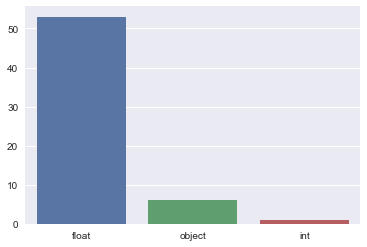

In [18]:
sns.barplot( x = ['float', 'object', 'int'], y = train_df.dtypes.value_counts(), data = prop_df)

In [17]:
print(train_df.dtypes.value_counts())

float64    53
object      6
int64       1
dtype: int64


In [19]:
#--- Checking if all the parcelids are unique in both the dataframes ---

print (prop_df['parcelid'].nunique())
print (prop_df.shape[0])

print (train_df['parcelid'].nunique())
print (train_df.shape[0]) 

2985217
2985217
90150
90275


### 5.2 Analyzing columns of type object

In [20]:
print(train_df['hashottuborspa'].nunique())
print(train_df['hashottuborspa'].unique())
print('\n')
print(train_df['propertycountylandusecode'].nunique())
print(train_df['propertycountylandusecode'].unique())
print('\n')
print(train_df['propertyzoningdesc'].nunique())
print(train_df['propertyzoningdesc'].unique())
print('\n')
print(train_df['fireplaceflag'].nunique())
print(train_df['fireplaceflag'].unique())
print('\n')
print(train_df['taxdelinquencyflag'].nunique())
print(train_df['taxdelinquencyflag'].unique()) 
print('\n') 
print(train_df['transactiondate'].nunique())

1
[nan True]


77
['0100' '1' '010C' '122' '1129' '34' '1128' '010E' '0104' '0101' '0200'
 '0700' '1111' '01DC' '010D' '1110' '0400' '012C' '010V' '1116' '01HC'
 '010G' '0300' '010F' '1117' '0103' '38' '1210' '0111' '010M' '96' '135'
 '0108' '1014' '1112' '0201' '0109' '1310' '010H' '1410' '1222' '1321'
 '1720' '1011' '1432' '0401' '0102' '012D' '73' '105' '0110' '100V' '0130'
 '8800' '0303' '0210' '1012' '1333' '0114' '01DD' '020G' '040A' '012E'
 '020M' '040V' '070D' '1200' '030G' '1722' '6050' '1421' '010' nan '200'
 '0' '1420' '0131' '0301']


1996
['LARS' nan 'PSR6' ..., 'SHCG' 'COR2YY' 'LNR2RPD-R3']


1
[nan True]


1
[nan 'Y']


352


In [21]:
train_df['hashottuborspa'] = train_df['hashottuborspa'].fillna(0)
train_df['fireplaceflag'] = train_df['fireplaceflag'].fillna(0)
train_df['taxdelinquencyflag'] = train_df['taxdelinquencyflag'].fillna(0)

#---  replace the string 'True' and 'Y' with value '1' ---

train_df.hashottuborspa = train_df.hashottuborspa.astype(np.int8)
train_df.fireplaceflag = train_df.fireplaceflag.astype(np.int8)
train_df['taxdelinquencyflag'].replace( 'Y', 1, inplace=True)
train_df.taxdelinquencyflag = train_df.taxdelinquencyflag.astype(np.int8)

In [22]:
train_df['transactiondate'] = pd.to_datetime(train_df['transactiondate'])

#--- Creating two additional columns each for the month and day ---
train_df['transaction_month'] = train_df.transactiondate.dt.month.astype(np.int64)
train_df['transaction_day'] = train_df.transactiondate.dt.weekday.astype(np.int64)

#--- Dropping the 'transactiondate' column now ---
train_df = train_df.drop('transactiondate', 1)

In [23]:
#--- Counting number of occurrences of Nan values in remaining two columns ---
print(train_df['propertycountylandusecode'].isnull().sum())
print(train_df['propertyzoningdesc'].isnull().sum())

1
31962


In [25]:
#--- Since there is only ONE missing value in this column we will replace it manually ---
train_df["propertycountylandusecode"].fillna('023A', inplace =True)
print(train_df['propertycountylandusecode'].isnull().sum())

0


In [26]:
train_df["propertyzoningdesc"].fillna('UNIQUE', inplace =True)
print(train_df['propertyzoningdesc'].isnull().sum())

0


### 5.3 Analyzing columns of type float
#### 5.3.1 Firstly, the target variable logerror.

In [27]:
#--- Statistics of the target variable ---

print(train_df['logerror'].describe())

count    90275.000000
mean         0.011457
std          0.161079
min         -4.605000
25%         -0.025300
50%          0.006000
75%          0.039200
max          4.737000
Name: logerror, dtype: float64


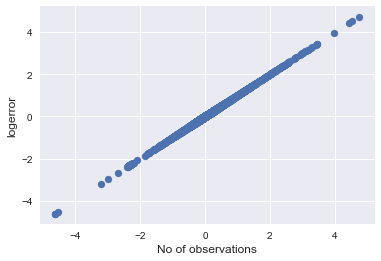

In [29]:
import matplotlib.pyplot as plt
plt.scatter(train_df['logerror'], train_df.logerror.values)
plt.xlabel('No of observations', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

In [30]:
#--- putting all columns of 'float' type in a list ---
float_cols = list(train_df.select_dtypes(include=['float']).columns)
print('There are {} columns of type float having missing values'.format(len(float_cols)))
print('\n')
print(float_cols)

There are 53 columns of type float having missing values


['logerror', 'airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid', 'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid', 'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet', 'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'propertylandusetypeid', 'rawcensustractandblock', 'regionidcity', 'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt', 'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid', 'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt', 'numberofstories', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyea

In [31]:
#--- putting columns of type 'float' having missing values in a list ---
float_nan_col = []
for column in float_cols:
    if (train_df[column].isnull().sum() > 0):
        float_nan_col.append(column)

print('There are {} columns of type float having missing values'.format(len(float_nan_col)))
print('\n')
print(float_nan_col)

There are 42 columns of type float having missing values


['airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft', 'buildingclasstypeid', 'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid', 'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'heatingorsystemtypeid', 'lotsizesquarefeet', 'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'regionidcity', 'regionidneighborhood', 'regionidzip', 'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid', 'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt', 'numberofstories', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount', 'taxdelinquencyyear', 'censustractandblock']


In [32]:
cols = ['regionidcity', 'regionidneighborhood', 'regionidzip']
print(train_df['regionidcity'].isnull().sum())
print(train_df['regionidneighborhood'].isnull().sum())
print(train_df['regionidzip'].isnull().sum())

train_df["regionidcity"].fillna(lambda x: np.random(train_df[train_df["regionidcity"] != np.nan]), inplace =True)
train_df["regionidneighborhood"].fillna(lambda x: np.random(train_df[train_df["regionidneighborhood"] != np.nan]), inplace =True)
train_df["regionidzip"].fillna(lambda x : np.random(train_df["regionidzip"] != np.nan) , inplace =True)

#--- cross check whether nan values are present or not ---
print(train_df['regionidcity'].isnull().sum())
print(train_df['regionidneighborhood'].isnull().sum())
print(train_df['regionidzip'].isnull().sum())

1803
54263
35
0
0
0


[   1.   nan    2.    4.    3.    6.  143.   11.    9.    5.   70.]
1.0      54503
2.0       2354
4.0        871
3.0        619
6.0          1
5.0          1
9.0          1
11.0         1
143.0        1
70.0         1
Name: unitcnt, dtype: int64


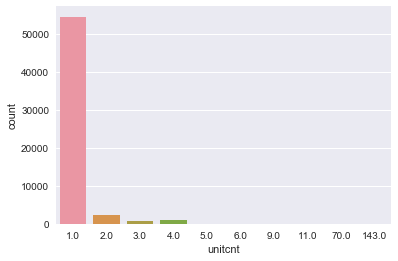

In [33]:
#--- some analysis on the column values ---

print(train_df['unitcnt'].unique())
print(train_df['unitcnt'].value_counts())
sns.countplot(x = 'unitcnt', data = train_df)

In [34]:
#--- Replace the missing values with the maximum occurences ---
train_df['unitcnt'] = train_df['unitcnt'].fillna(train_df['unitcnt'].mode()[0])

#--- cross check for missing values ---
print(train_df['unitcnt'].isnull().sum())

0


In [35]:
print(train_df['censustractandblock'].corr(train_df['rawcensustractandblock']))

0.999821941992


In [36]:
print(train_df['censustractandblock'].nunique())
print(train_df['rawcensustractandblock'].nunique())

42398
42647


In [38]:
'''  #--- to be continued ---
print(train_df['censustractandblock'].isnull().sum())
#print('\n')
#print(train_df['rawcensustractandblock'].nunique())

#train_df['censustractandblock'] = train_df['censustractandblock'].fillna()
pop = pd.DataFrame()
pop['censustractandblock'] = train_df['censustractandblock'] 
print(pop.shape[0])

a = 0
count = 0
for i in pop['censustractandblock']:
    if (np.isnan(i)):
        a = train_df.iloc[count]['rawcensustractandblock']
        #a.append(train_df['rawcensustractandblock'].iloc())
        for j in pop['censustractandblock']:
            if ((np.isfinite(j)) & ( )):
                
        count+=1
print(count)
#pop['censustractandblock'] = pop['censustractandblock'].fillna(pop['censustractandblock'] /
       # if )
print (a)    
''' 

"  #--- to be continued ---\nprint(train_df['censustractandblock'].isnull().sum())\n#print('\n')\n#print(train_df['rawcensustractandblock'].nunique())\n\n#train_df['censustractandblock'] = train_df['censustractandblock'].fillna()\npop = pd.DataFrame()\npop['censustractandblock'] = train_df['censustractandblock'] \nprint(pop.shape[0])\n\na = 0\ncount = 0\nfor i in pop['censustractandblock']:\n    if (np.isnan(i)):\n        a = train_df.iloc[count]['rawcensustractandblock']\n        #a.append(train_df['rawcensustractandblock'].iloc())\n        for j in pop['censustractandblock']:\n            if ((np.isfinite(j)) & ( )):\n                \n        count+=1\nprint(count)\n#pop['censustractandblock'] = pop['censustractandblock'].fillna(pop['censustractandblock'] /\n       # if )\nprint (a)    \n"

In [37]:
print(train_df['yearbuilt'].sort_values().unique())

[ 1885.  1886.  1887.  1888.  1890.  1891.  1892.  1893.  1894.  1895.
  1896.  1897.  1898.  1899.  1900.  1901.  1902.  1903.  1904.  1905.
  1906.  1907.  1908.  1909.  1910.  1911.  1912.  1913.  1914.  1915.
  1916.  1917.  1918.  1919.  1920.  1921.  1922.  1923.  1924.  1925.
  1926.  1927.  1928.  1929.  1930.  1931.  1932.  1933.  1934.  1935.
  1936.  1937.  1938.  1939.  1940.  1941.  1942.  1943.  1944.  1945.
  1946.  1947.  1948.  1949.  1950.  1951.  1952.  1953.  1954.  1955.
  1956.  1957.  1958.  1959.  1960.  1961.  1962.  1963.  1964.  1965.
  1966.  1967.  1968.  1969.  1970.  1971.  1972.  1973.  1974.  1975.
  1976.  1977.  1978.  1979.  1980.  1981.  1982.  1983.  1984.  1985.
  1986.  1987.  1988.  1989.  1990.  1991.  1992.  1993.  1994.  1995.
  1996.  1997.  1998.  1999.  2000.  2001.  2002.  2003.  2004.  2005.
  2006.  2007.  2008.  2009.  2010.  2011.  2012.  2013.  2014.  2015.
    nan]


In [39]:
train_df['yearbuilt'] = train_df['yearbuilt'].fillna(2016)

#--- cross check for missing values ---
print(train_df['yearbuilt'].isnull().sum())

0


In [40]:
#--- list of columns of type 'float' having missing values
#--- float_nan_col 

#--- list of columns of type 'float' after imputing missing values ---
float_filled_cols = ['regionidcity', 'regionidneighborhood', 'regionidzip', 'unitcnt', 'censustractandblock', 'yearbuilt']

count = 0
for i in float_nan_col:
    if i not in float_filled_cols:
        train_df[i] = train_df[i].fillna(0)
        count+=1
print(count)

36


In [41]:
print(len(float_nan_col))

42


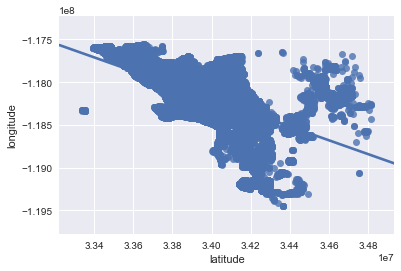

In [42]:
sns.regplot(x = 'latitude', y = 'longitude', data = train_df)

In [43]:
x = train_df.iloc[1]
print(x)

parcelid                                                  14366692
logerror                                                   -0.1684
airconditioningtypeid                                            0
architecturalstyletypeid                                         0
basementsqft                                                     0
bathroomcnt                                                    3.5
bedroomcnt                                                       4
buildingclasstypeid                                              0
buildingqualitytypeid                                            0
calculatedbathnbr                                              3.5
decktypeid                                                       0
finishedfloor1squarefeet                                         0
calculatedfinishedsquarefeet                                  2263
finishedsquarefeet12                                          2263
finishedsquarefeet13                                          

### CREATING NEW FEATURES:
#### Let us create new features using the existing one in the dataframe

In [44]:
#--- how old is the house? ---
train_df['house_age'] = 2017 - train_df['yearbuilt']

#--- how many rooms are there? ---  
train_df['tot_rooms'] = train_df['bathroomcnt'] + train_df['bedroomcnt']

#--- does the house have A/C? ---
train_df['AC'] = np.where(train_df['airconditioningtypeid']>0, 1, 0)

#--- Does the house have a deck? ---
train_df['deck'] = np.where(train_df['decktypeid']>0, 1, 0)
train_df.drop('decktypeid', axis=1, inplace=True)

#--- does the house have a heating system? ---
train_df['heating_system'] = np.where(train_df['heatingorsystemtypeid']>0, 1, 0)

#--- does the house have a garage? ---
train_df['garage'] = np.where(train_df['garagecarcnt']>0, 1, 0)

#--- does the house come with a patio? ---
train_df['patio'] = np.where(train_df['yardbuildingsqft17']>0, 1, 0)

#--- does the house have a pool?
train_df['pooltypeid10'] = train_df.pooltypeid10.astype(np.int8)
train_df['pooltypeid7'] = train_df.pooltypeid7.astype(np.int8)
train_df['pooltypei2'] = train_df.pooltypeid2.astype(np.int8)
train_df['pool'] = train_df['pooltypeid10'] | train_df['pooltypeid7'] | train_df['pooltypeid2'] 

#--- does the house have all of these? -> spa/hot-tub/pool, A/C, heating system , garage, patio
train_df['exquisite'] = train_df['pool'] + train_df['patio'] + train_df['garage'] + train_df['heating_system'] + train_df['AC'] 

#--- Features based on location ---
train_df['x_loc'] = np.cos(train_df['latitude']) * np.cos(train_df['longitude'])
train_df['y_loc'] = np.cos(train_df['latitude']) * np.sin(train_df['longitude'])
train_df['z_loc'] = np.sin(train_df['latitude'])

print('DONE')

DONE


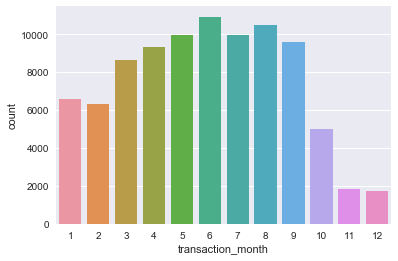

In [45]:
#train_df['transaction_year']
sns.countplot(x = 'transaction_month', data = train_df)

In [46]:
#--- create an additional feature called season ---
def seas(x):
    if 2 < x < 6:
        return 1        #--- Spring
    elif 5 < x < 9:
        return 2        #---Summer
    elif 8 < x < 12:
        return 3        #--- Fall (Autumn) 
    else:
        return 4        #--- Winter 

train_df['season'] = train_df['transaction_month'].apply(seas)

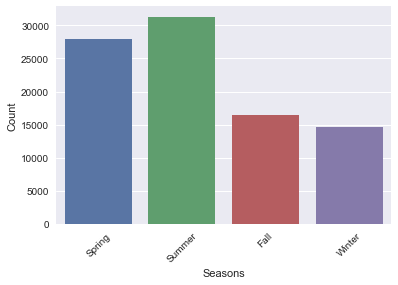

In [47]:
ax = sns.countplot(x = 'season', data = train_df)
ax.set(xlabel='Seasons', ylabel='Count')
season_list=['Spring','Summer','Fall','Winter']
plt.xticks(range(4), season_list, rotation=45)
plt.show()

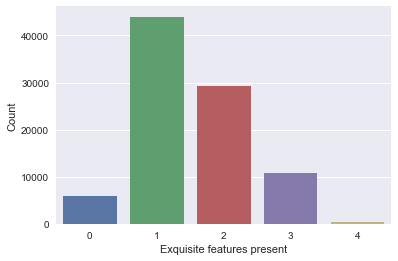

In [48]:
ax = sns.countplot(x = 'exquisite', data = train_df)
ax.set(xlabel='Exquisite features present', ylabel='Count')
plt.show()

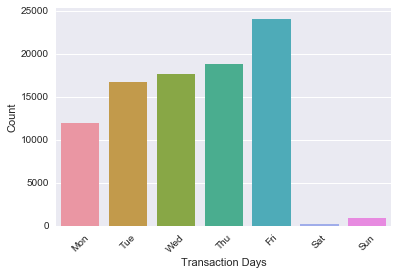

In [49]:
ax = sns.countplot(x = 'transaction_day', data = train_df)
ax.set(xlabel='Transaction Days', ylabel='Count')
days_list=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(range(len(days_list)), days_list, rotation=45)
plt.show()

In [50]:
#--- create an additional feature called weekday_trans ---
def weekday_transaction(x):
    if 4 < x <= 6:
        return 1        #--- Weekend
    else:
        return 2        #--- Weekday

train_df['weekday_trans'] = train_df['transaction_day'].apply(weekday_transaction)

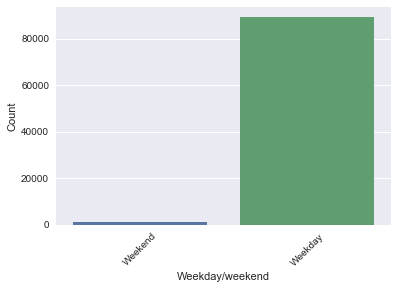

In [51]:
ax = sns.countplot(x = 'weekday_trans', data = train_df)
ax.set(xlabel='Weekday/weekend', ylabel='Count')
weekend_day_list=['Weekend', 'Weekday']
plt.xticks(range(len(weekend_day_list)), weekend_day_list, rotation=45)
plt.show()

In [52]:
#--- living area ---
train_df['LivingArea'] = train_df['calculatedfinishedsquarefeet']/train_df['lotsizesquarefeet']
train_df['LivingArea_2'] = train_df['finishedsquarefeet12']/train_df['finishedsquarefeet15']

#--- Extra space available
train_df['ExtraSpace'] = train_df['lotsizesquarefeet'] - train_df['calculatedfinishedsquarefeet'] 
train_df['ExtraSpace-2'] = train_df['finishedsquarefeet15'] - train_df['finishedsquarefeet12'] 

#### New features based on TAX

In [53]:
#Ratio of tax of property over parcel
train_df['ValueRatio'] = train_df['taxvaluedollarcnt']/train_df['taxamount']

#TotalTaxScore
train_df['TaxScore'] = train_df['taxvaluedollarcnt']*train_df['taxamount']

#### New features based on the address

In [56]:
#Number of properties in the zip
zip_count = train_df['regionidzip'].value_counts().to_dict()
train_df['zip_count'] = train_df['regionidzip'].map(zip_count)

#Number of properties in the city
city_count = train_df['regionidcity'].value_counts().to_dict()
train_df['city_count'] = train_df['regionidcity'].map(city_count)

#Number of properties in the country
region_count = train_df['regionidcounty'].value_counts().to_dict()
train_df['county_count'] = train_df['regionidcounty'].map(region_count)

In [57]:
#--- Number of columns present in our dataframe now ---
a = train_df.columns.tolist()
print('Now there are {} columns in our dataframe'.format(len(a)))

Now there are 84 columns in our dataframe


### VISUALIZATIONS
#### 1. Target Variable

        val
0  1.027984
1  0.845016
2  0.996008
3  1.022039
4  0.995012


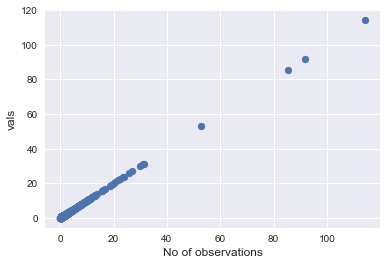

In [58]:
import math
p = pd.DataFrame()
p['val'] = np.exp(train_df['logerror'])
print(p.head())

plt.scatter(p['val'], p.val.values)
plt.xlabel('No of observations', fontsize=12)
plt.ylabel('vals', fontsize=12)
plt.show()

In [59]:
print(p.describe())

                val
count  90275.000000
mean       1.032591
std        0.711017
min        0.010002
25%        0.975017
50%        1.006018
75%        1.039978
max      114.091414


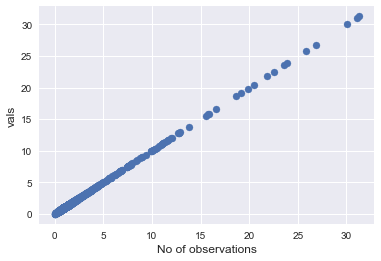

                val
count  90271.000000
mean       1.028826
std        0.405412
min        0.010002
25%        0.975017
50%        1.006018
75%        1.039978
max       31.280660


In [60]:
p = p[p['val'] < 40]

plt.scatter(p['val'], p.val.values)
plt.xlabel('No of observations', fontsize=12)
plt.ylabel('vals', fontsize=12)
plt.show()

print(p.describe())

(array([  2.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   4.00000000e+00,
          2.80000000e+01,   8.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          4.00000000e+00,   2.00000000e+00,   5.00000000e+00,
          3.00000000e+00,   9.00000000e+00,   7.00000000e+00,
          1.50000000e+01,   1.20000000e+01,   2.00000000e+01,
          3.80000000e+01,   4.60000000e+01,   6.80000000e+01,
          8.10000000e+01,   1.11000000e+02,   2.08000000e+02,
          4.44000000e+02,   9.45000000e+02,   2.80000000e+03,
        

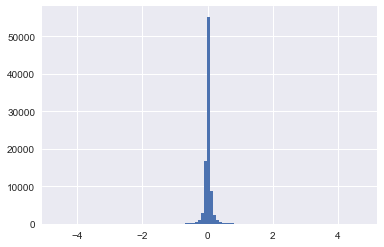

In [61]:
#plt.hist(np.log(train_df['trip_duration']+25), bins = 25)
plt.hist(train_df['logerror'], bins = 100)

#### 2. Correlations

([<matplotlib.axis.YTick at 0x11b40d748>,
 <a list of 79 Text yticklabel objects>)

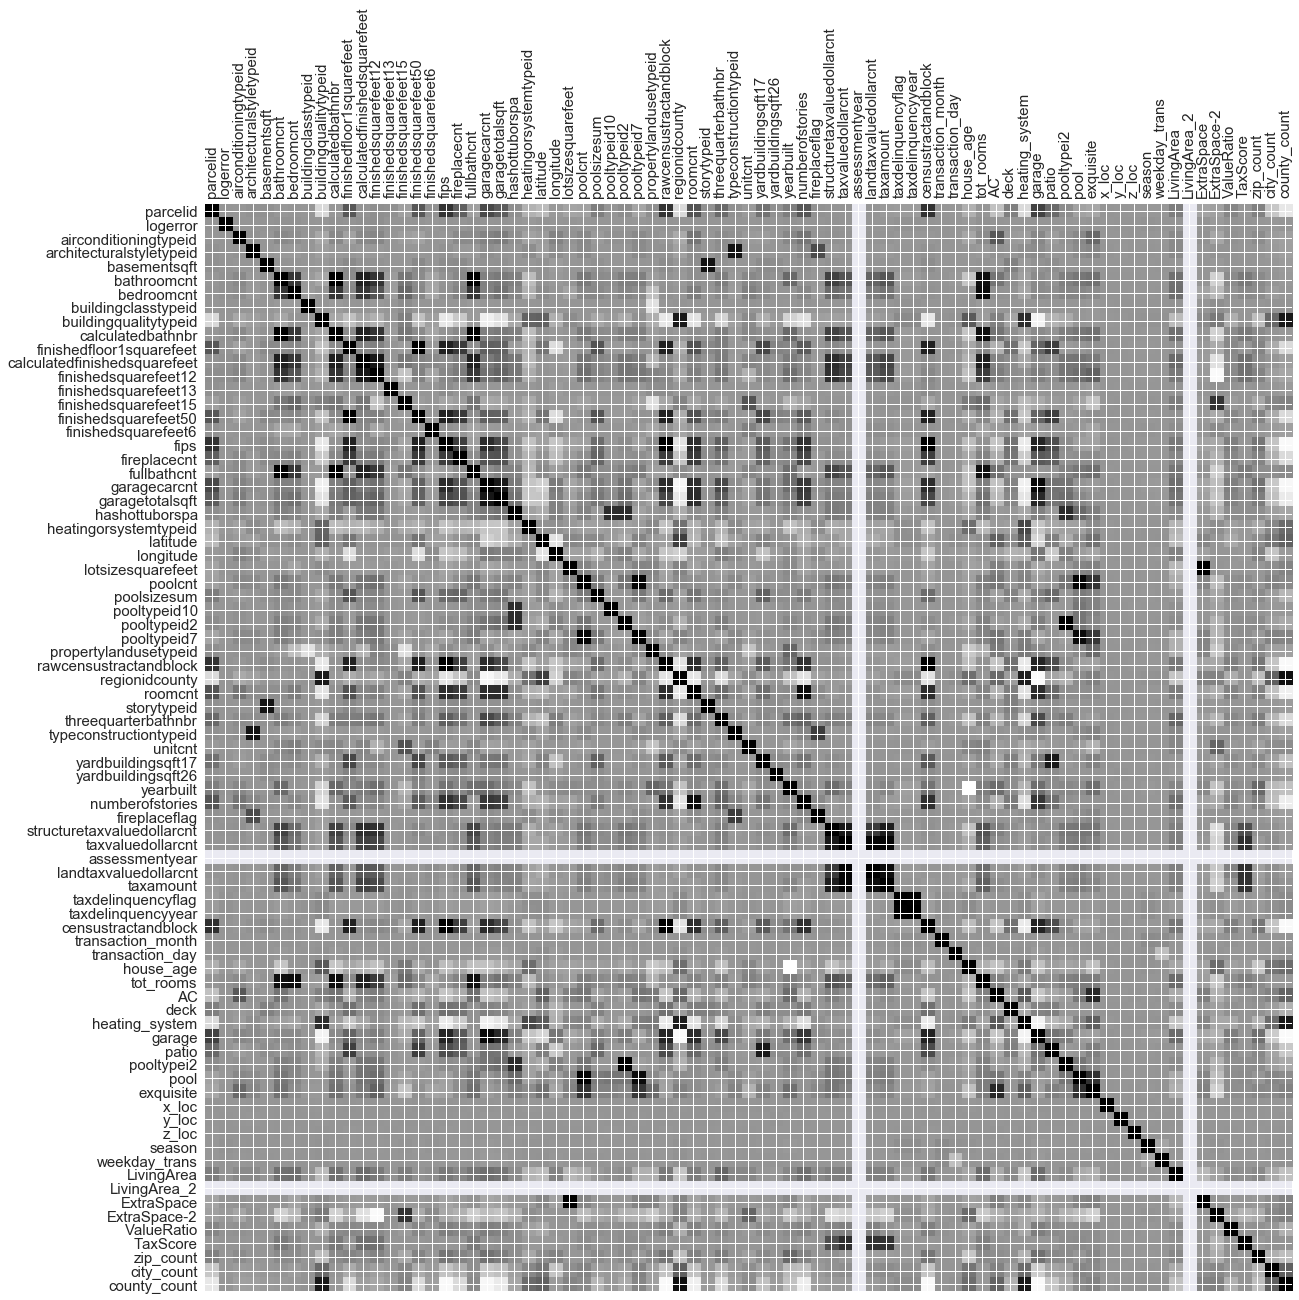

In [62]:
corr = train_df.corr()
fig, ax = plt.subplots(figsize=(20, 20))
ax.matshow(corr)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
plt.xticks(range(len(corr.columns)), corr.columns, fontsize = 15)
plt.yticks(range(len(corr.columns)), corr.columns, fontsize = 15)

#### Number of houses built VS year

In [63]:
alist = []
alist = train_df['yearbuilt'].unique()
alist.sort()

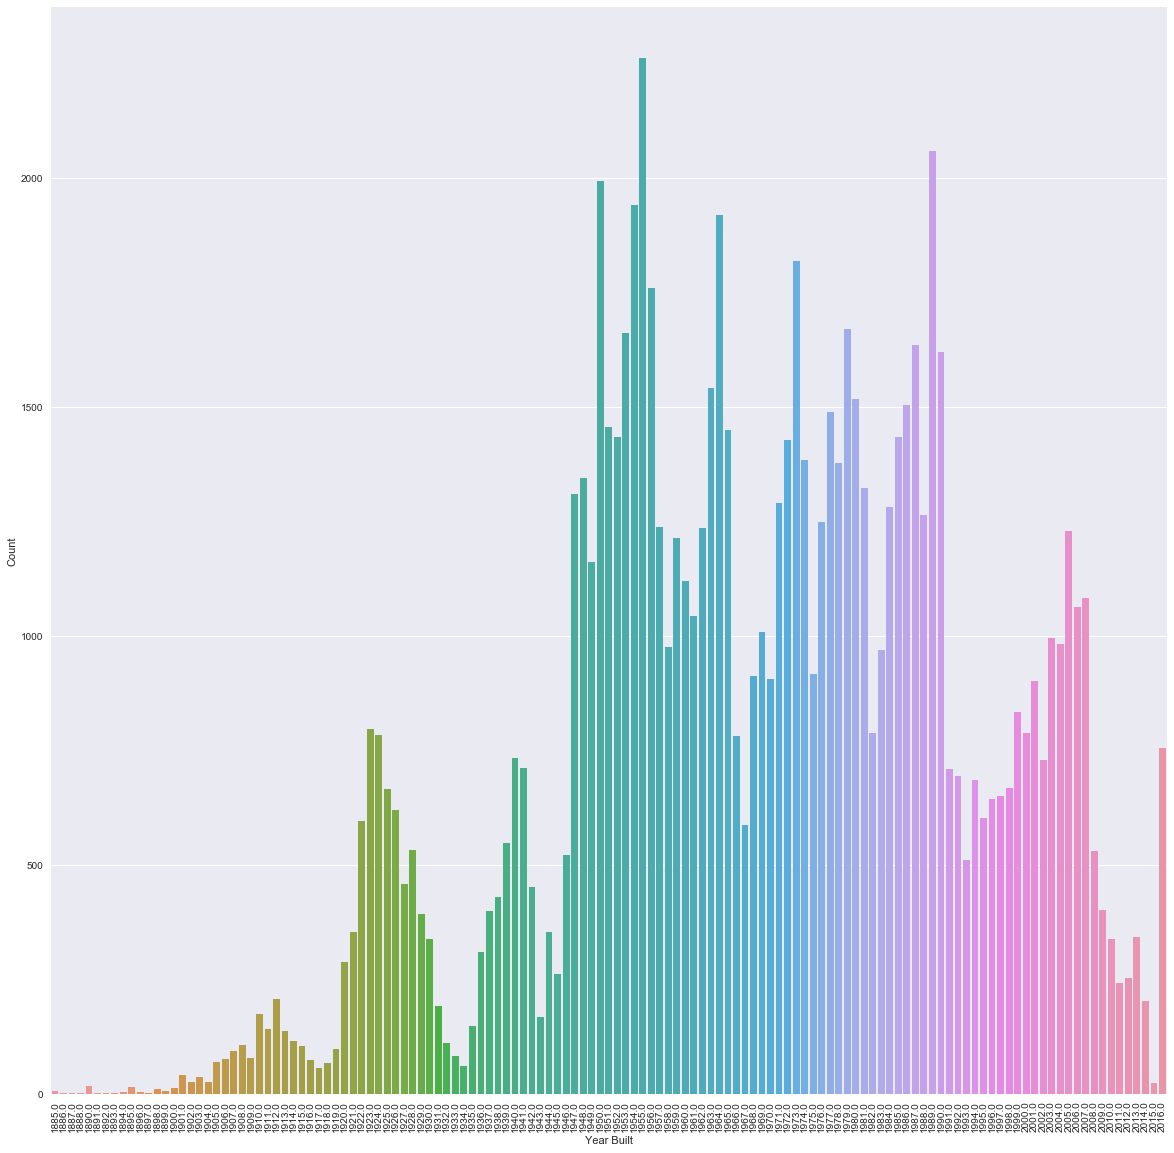

In [64]:
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(20, 20))
ax = sns.countplot(x = 'yearbuilt', data = train_df)
ax.set(xlabel='Year Built', ylabel='Count')
#weekend_day_list=['Weekend', 'Weekday']
plt.xticks(range(len(alist)), alist, rotation=90)
plt.show()

In [ ]:
'''
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(20, 20))
ax = sns.countplot(x = 'yearbuilt', data = train_df)
ax.set(xlabel='Year Built', ylabel='Count')
#weekend_day_list=['Weekend', 'Weekday']
plt.xticks(range(len(alist)), alist, rotation=90)
plt.show()
''' 
'''
x = list(train_df['yearbuilt'])
y = train_df['logerror']
fig = plt.bar(x, y)
plt.show()
'''

### MEMORY CONSUMPTION
#### Let us look into the memory consumption of our dataframe and see if we can reduce it efficiently.

In [65]:
#--- Memory usage of entire dataframe ---
mem = train_df.memory_usage(index=True).sum()
print(mem/ 1024**2," MB")

56.82465076446533  MB


In [66]:
#--- Memory usage of each column ---
print(train_df.memory_usage()/ 1024**2)  #--- in MB ---

Index                           3.188744
parcelid                        0.688744
logerror                        0.688744
airconditioningtypeid           0.688744
architecturalstyletypeid        0.688744
basementsqft                    0.688744
bathroomcnt                     0.688744
bedroomcnt                      0.688744
buildingclasstypeid             0.688744
buildingqualitytypeid           0.688744
calculatedbathnbr               0.688744
finishedfloor1squarefeet        0.688744
calculatedfinishedsquarefeet    0.688744
finishedsquarefeet12            0.688744
finishedsquarefeet13            0.688744
finishedsquarefeet15            0.688744
finishedsquarefeet50            0.688744
finishedsquarefeet6             0.688744
fips                            0.688744
fireplacecnt                    0.688744
fullbathcnt                     0.688744
garagecarcnt                    0.688744
garagetotalsqft                 0.688744
hashottuborspa                  0.086093
heatingorsystemt

In [67]:
#--- List of columns that cannot be reduced in terms of memory size ---
count = 0
for col in train_df.columns:
    if train_df[col].dtype == object:
        count+=1
        print (col)
print('There are {} columns that cannot be reduced'.format(count))    

propertycountylandusecode
propertyzoningdesc
regionidcity
regionidneighborhood
regionidzip
There are 5 columns that cannot be reduced


In [68]:
count = 0
for col in train_df.columns:
    if train_df[col].dtype != object:
        if ((train_df[col].max() < 255) & (train_df[col].min() > -255)):
            if((col != 'logerror')|(col != 'yearbuilt')|(col != 'xloc')|(col != 'yloc')|(col != 'zloc')):
                count+=1
                train_df[col] = train_df[col].astype(np.int8)
                print (col)
print(count)

logerror
airconditioningtypeid
architecturalstyletypeid
bathroomcnt
bedroomcnt
buildingclasstypeid
buildingqualitytypeid
calculatedbathnbr
fireplacecnt
fullbathcnt
garagecarcnt
hashottuborspa
heatingorsystemtypeid
poolcnt
pooltypeid10
pooltypeid2
pooltypeid7
roomcnt
storytypeid
threequarterbathnbr
typeconstructiontypeid
unitcnt
numberofstories
fireplaceflag
taxdelinquencyflag
taxdelinquencyyear
transaction_month
transaction_day
house_age
tot_rooms
AC
deck
heating_system
garage
patio
pooltypei2
pool
exquisite
x_loc
y_loc
z_loc
season
weekday_trans
43


In [69]:
#--- Memory usage of reduced dataframe ---
mem = train_df.memory_usage(index=True).sum()
print(mem/ 1024**2," MB")

35.12922763824463  MB


In [70]:
#--- Reducing memory of `float64` type columns to `float32` type columns

count = 0
for col in train_df.columns:
    if train_df[col].dtype != object:
        if train_df[col].dtype == float:
            train_df[col] = train_df[col].astype(np.float32)
            count+=1
print('There were {} such columns'.format(count))

There were 32 such columns


In [71]:
#--- Let us check the memory consumed again ---
mem = train_df.memory_usage(index=True).sum()
print(mem/ 1024**2," MB")

24.10933017730713  MB


In [72]:
#print(train_df.dtypes)
#print(train_df.dtypes.value_counts())
col_int64 = []
for col in train_df.columns:
    if train_df[col].dtype == 'int64':
        print(col)
        col_int64.append(col)
print(col_int64)

parcelid
zip_count
city_count
county_count
['parcelid', 'zip_count', 'city_count', 'county_count']


In [73]:
for i in col_int64:
    print('{} - {} and {}'.format(i, max(train_df[i]), min(train_df[i])) )

parcelid - 162960842 and 10711738
zip_count - 912 and 1
city_count - 20559 and 1
county_count - 58574 and 7196


In [74]:
train_df['zip_count'] = train_df['zip_count'].astype(np.int32)
train_df['city_count'] = train_df['city_count'].astype(np.int32)
train_df['county_count'] = train_df['county_count'].astype(np.int32)

In [75]:
#--- Let us check the memory consumed again ---
mem = train_df.memory_usage(index=True).sum()
print(mem/ 1024**2," MB")

23.07621479034424  MB
